In [1]:
!pip install tensorflow

!pip install matplotlib


In [2]:
import os
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [3]:
# Set the path to your dataset
dataset_path = "C:/Users/NHI652/Downloads/archive/training_set"

# Create a data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6404 images belonging to 1 classes.
Found 1601 images belonging to 1 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10


201/201 [==============================] - 95s 462ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
201/201 [==============================] - 70s 346ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
201/201 [==============================] - 60s 297ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
201/201 [==============================] - 60s 297ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
201/201 [==============================] - 63s 316ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
201/201 [==============================] - 61s 305ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
201/201 [==============================] - 61s 304ms/step - loss: 0.0000e

In [7]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc}')


51/51 [==============================] - 7s 133ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 1.0


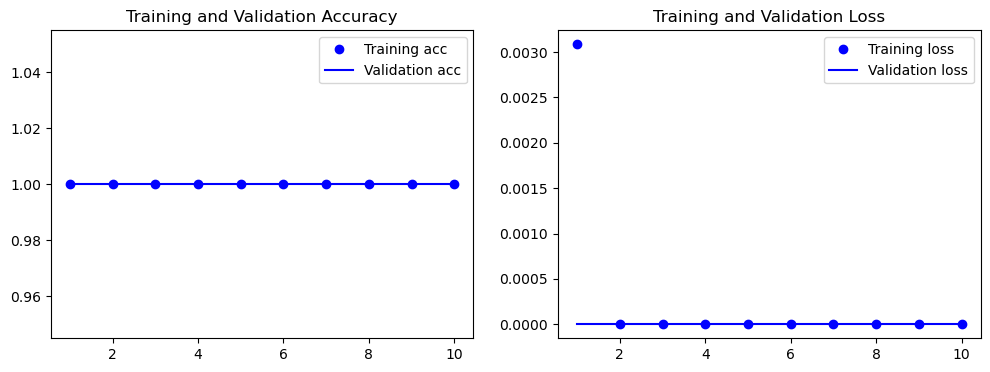

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [10]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [11]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)


Epoch 1/20
201/201 [==============================] - 68s 337ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
201/201 [==============================] - 65s 324ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
201/201 [==============================] - 70s 350ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
201/201 [==============================] - 68s 337ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
201/201 [==============================] - 64s 319ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
201/201 [==============================] - 65s 325ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
201/201 [==============================] - 67s 335ms/step - loss: 0.000

In [12]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predictions
true_labels = validation_generator.classes
predictions = (model.predict(validation_generator) > 0.5).astype(int).flatten()

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Display classification report
print("\nClassification Report:\n", classification_report(true_labels, predictions))


51/51 [==============================] - 7s 127ms/step
Confusion Matrix:
 [[1601]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1601

    accuracy                           1.00      1601
   macro avg       1.00      1.00      1.00      1601
weighted avg       1.00      1.00      1.00      1601



In [15]:
base_model = tf.keras.applications.VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [16]:
base_model.trainable = True

# Fine-tune only the last few layers
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
201/201 [==============================] - 390s 2s/step - loss: 0.0101 - accuracy: 0.9941 - val_loss: 2.7667e-05 - val_accuracy: 1.0000
Epoch 2/10
201/201 [==============================] - 389s 2s/step - loss: 1.1425e-05 - accuracy: 1.0000 - val_loss: 1.0820e-05 - val_accuracy: 1.0000
Epoch 3/10
201/201 [==============================] - 400s 2s/step - loss: 5.0314e-06 - accuracy: 1.0000 - val_loss: 5.5745e-06 - val_accuracy: 1.0000
Epoch 4/10
201/201 [==============================] - 424s 2s/step - loss: 2.7029e-06 - accuracy: 1.0000 - val_loss: 2.4953e-06 - val_accuracy: 1.0000
Epoch 5/10
201/201 [==============================] - 470s 2s/step - loss: 5.8484e-07 - accuracy: 1.0000 - val_loss: 2.3469e-07 - val_accuracy: 1.0000
Epoch 6/10
201/201 [==============================] - 481s 2s/step - loss: 8.6867e-08 - accuracy: 1.0000 - val_loss: 8.5915e-08 - val_accuracy: 1.0000
Epoch 7/10
201/201 [==============================] - 463s 2s/step - loss: 3.9484e-08 - accuracy: 

In [17]:
model.add(layers.Dropout(0.5))


In [18]:
predictions = (model.predict(validation_generator) > 0.6).astype(int).flatten()


51/51 [==============================] - 68s 1s/step


In [19]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
201/201 [==============================] - 366s 2s/step - loss: 9.1713e-09 - accuracy: 1.0000 - val_loss: 1.3039e-08 - val_accuracy: 1.0000
Epoch 2/10
201/201 [==============================] - 429s 2s/step - loss: 7.2988e-09 - accuracy: 1.0000 - val_loss: 1.0545e-08 - val_accuracy: 1.0000
Epoch 3/10
201/201 [==============================] - 410s 2s/step - loss: 5.9587e-09 - accuracy: 1.0000 - val_loss: 8.6974e-09 - val_accuracy: 1.0000
Epoch 4/10
201/201 [==============================] - 395s 2s/step - loss: 4.9600e-09 - accuracy: 1.0000 - val_loss: 7.3267e-09 - val_accuracy: 1.0000
Epoch 5/10
201/201 [==============================] - 397s 2s/step - loss: 4.1935e-09 - accuracy: 1.0000 - val_loss: 6.2155e-09 - val_accuracy: 1.0000
Epoch 6/10
201/201 [==============================] - 392s 2s/step - loss: 3.5880e-09 - accuracy: 1.0000 - val_loss: 5.3452e-09 - val_accuracy: 1.0000
Epoch 7/10
201/201 [==============================] - 390s 2s/step - loss: 3.1018e-09 - accura

In [20]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc}')


51/51 [==============================] - 73s 1s/step - loss: 3.2134e-09 - accuracy: 1.0000
Test Accuracy: 1.0


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = validation_generator.classes
predictions = (model.predict(validation_generator) > 0.5).astype(int).flatten()

conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:\n", conf_matrix)

print("\nClassification Report:\n", classification_report(true_labels, predictions))


51/51 [==============================] - 75s 1s/step
Confusion Matrix:
 [[1601]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1601

    accuracy                           1.00      1601
   macro avg       1.00      1.00      1.00      1601
weighted avg       1.00      1.00      1.00      1601



In [31]:
# Example: Make predictions on a single image
new_image_path = "C:/Users/NHI652/Downloads/archive/test_set/test_set/cats/cat.4005.jpg"
img = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
if predictions[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")


1/1 [==============================] - 0s 82ms/step
It's a cat!
